Imports


In [207]:
# Install haversine if required
#!pip install haversine

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import geopy.distance
import haversine as hs
from haversine import Unit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
from tkinter import filedialog

Load data


In [211]:
# Load dataset

# VS Code compatable
# file_path = filedialog.askopenfilename(title="Select the CSV file")
# df = pd.read_csv(file_path)

# Colab compatable ie. dataset must be uploaded to colab session notebook
df = pd.read_csv('Dataset1.csv')

Drop column 1 and 2

In [212]:
# Remove unnecessary columns
df.drop(['key','Unnamed: 0'], axis=1, inplace=True)
df.dropna(axis=0,inplace=True)

In [213]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [214]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

print('\r')

# Display the columns of the dataset
print("\nFields of the dataset:")
print(df.columns)


First few rows of the dataset:
   fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  


Fields of the dataset:
Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude'

Extract hours from date time

In [215]:
# Convert 'pickup_datetime' to a datetime data type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the date, time, and other components
df['hours'] = df['pickup_datetime'].dt.hour

In [216]:
# Remove unnecessary fields
df.drop('pickup_datetime', axis=1, inplace=True)
df.drop('passenger_count', axis=1, inplace=True)

Remove latitude and longitude values not in range

In [217]:
# Drop the rows where the latitude and longitude are not in range
condition = df[
    (df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180) |
    (df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) |
    (df['dropoff_longitude'] < -180) | (df['dropoff_longitude'] > 180) |
    (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90)
].index
df.drop(condition, inplace=True)

Calculate Distance

In [218]:
# Calculate the distance between pickup and dropoff locations
longitude, latitude = [], []

longitude.append(df["pickup_longitude"].tolist())
longitude.append(df["dropoff_longitude"].tolist())
latitude.append(df["pickup_latitude"].tolist())
latitude.append(df["dropoff_latitude"].tolist())

# Find the distance in miles
distance = [hs.haversine((latitude[1][i], longitude[1][i]), (latitude[0][i], longitude[0][i]), unit=Unit.MILES)
              for i in range(len(longitude[0]))]

# Append the new distance column to the dataset
df['distance'] = distance

In [219]:
df.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'] , inplace=True , axis= 1)
df.head()

,fare_amount,hours,distance
0,7.5,19,1.045970
1,7.7,20,1.527078
2,12.9,21,3.129464
3,5.3,8,1.032524
4,16.0,17,2.780920


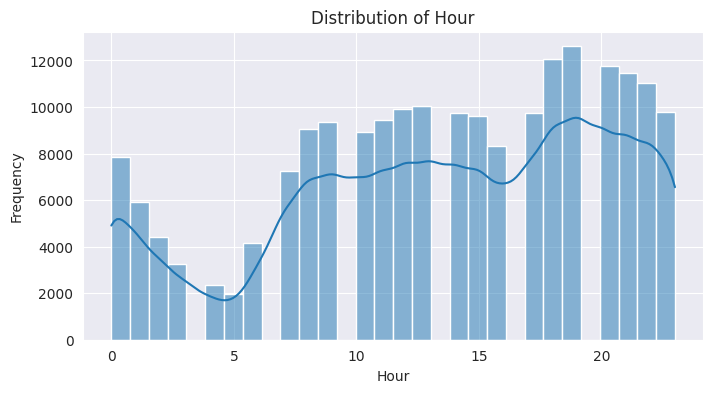

In [220]:
# Visualize the distribution of 'hours'
plt.figure(figsize=(8, 4))
sns.set_style(style='darkgrid')
sns.histplot(df['hours'], bins=30, kde=True)
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

Remove Outliers

In [221]:
# Drop the rows where the fare amount is <=0 and distance is <=0
df.drop(df[df['fare_amount']<=0].index,inplace=True)
df.drop(df[df['distance']<=0].index,inplace=True)

# Drop distance and fair amount outliers
df.drop(df[df['distance']>60].index,inplace=True)
df.drop(df[df['distance']>100].index,inplace=True)
df.drop(df[df['fare_amount']>100].index,inplace=True)

# Drop unrealistic fair amounts and distance travelled
df.drop(df[(df['fare_amount']>=100) & (df['distance']<=1)].index,inplace=True)
df.drop(df[(df['fare_amount']<=100) & (df['distance']>=100)].index,inplace=True)


Distance vs fare amount graph

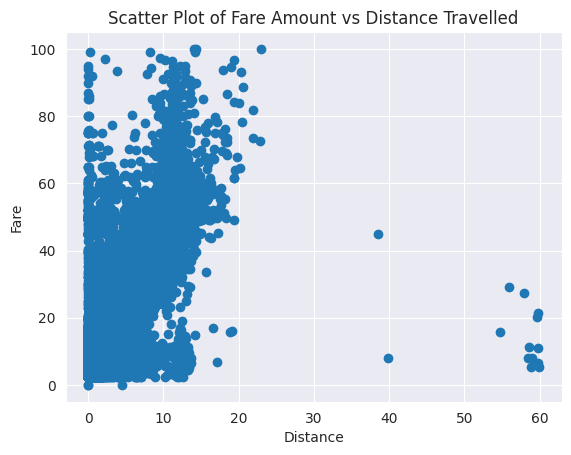

In [222]:
plt.scatter(df['distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.title('Scatter Plot of Fare Amount vs Distance Travelled')
plt.show()

In [223]:
x = df.drop(['fare_amount'],axis = 1)
y = df['fare_amount'].values.reshape(-1, 1)

In [224]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

Standardize values

In [225]:
y_std = std.fit_transform(y)
x_std = std.fit_transform(x)

In [226]:
# Model Evaluation
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=42)

Linear Regression


In [227]:
# Create linear model and train
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

# Train the model
LR.fit(x_train,y_train)

# Use model to predict on test data
LR_y_predict = LR.predict(x_test)

Linear Regression Accuracy


In [ ]:
# Calculate regression metrics
mse = mean_squared_error(y_test, LR_y_predict)
mae = mean_absolute_error(y_test, LR_y_predict)
r2 = r2_score(y_test, LR_y_predict)
rmse = np.sqrt(mse)

print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression Root Mean Squared Error:", rmse)
print("Linear Regression Mean Absolute Error:", mae)
print("Linear Regression R-squared:", r2)

Random Forest

In [229]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(x_train, y_train.ravel())

# Make predictions on the test set
RF_y_pred = rf_regressor.predict(x_test)

In [230]:
# Calculate regression metrics
mse = mean_squared_error(y_test, RF_y_pred)
mae = mean_absolute_error(y_test, RF_y_pred)
r2 = r2_score(y_test, RF_y_pred)
rmse = np.sqrt(mse)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest Root Mean Squared Error:", rmse)
print("Random Forest Mean Absolute Error:", mae)
print("Random Forest R-squared:", r2)

Random Forest Mean Squared Error: 0.25342707344428694
Random Forest Root Mean Squared Error: 0.5034154084295464
Random Forest Mean Absolute Error: 0.27733105623211546
Random Forest R-squared: 0.7556587025306623


Gradiant Boosting Regression

In [231]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Train the model
gb_regressor.fit(x_train, y_train.ravel())

# Make predictions on the test set
GB_y_pred = gb_regressor.predict(x_test)

In [232]:
# Calculate regression metrics
mse = mean_squared_error(y_test, GB_y_pred)
mae = mean_absolute_error(y_test, GB_y_pred)
r2 = r2_score(y_test, GB_y_pred)
rmse = np.sqrt(mse)

print("Gradiant Boosting Mean Squared Error:", mse)
print("Gradiant Boosting Root Mean Squared Error:", rmse)
print("Gradiant Boosting Mean Absolute Error:", mae)
print("Gradiant Boosting R-squared:", r2)

Gradiant Boosting Mean Squared Error: 0.20439547756761983
Gradiant Boosting Root Mean Squared Error: 0.45210118067487925
Gradiant Boosting Mean Absolute Error: 0.24043026480072477
Gradiant Boosting R-squared: 0.8029324353275287


In [233]:
y_pred = LR.predict(x_test)
df = {'Actual': y_test, 'Predicted': y_pred}

from tabulate import tabulate
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

+--------------+--------------+
|       Actual |    Predicted |
|--------------+--------------|
| -0.256346    | -0.0165663   |
| -0.138818    | -0.601892    |
|  0.395404    | -0.118379    |
| -0.566195    | -0.318427    |
| -0.341822    | -0.214904    |
|  0.448826    |  0.453733    |
|  0.235137    | -0.242091    |
| -0.128133    | -0.353004    |
|  0.598408    |  1.5245      |
| -0.854675    | -0.690261    |
| -0.256346    |  0.0924568   |
| -0.598248    | -0.477911    |
| -0.256346    |  0.0890652   |
| -0.299084    | -0.0529852   |
|  0.0214488   | -0.385802    |
| -0.0853955   | -0.135317    |
| -0.811937    | -0.693724    |
|  0.395404    |  0.562162    |
| -0.0853955   | -0.149694    |
| -0.341822    | -0.17782     |
| -0.619617    | -0.317343    |
| -0.470035    | -0.438826    |
| -0.405929    | -0.268461    |
|  0.256506    |  0.377125    |
| -0.673039    | -0.578402    |
|  0.256506    |  0.344107    |
| -0.256346    | -0.581406    |
| -0.619617    | -0.680112    |
| -0.726

Actual vs Predicted

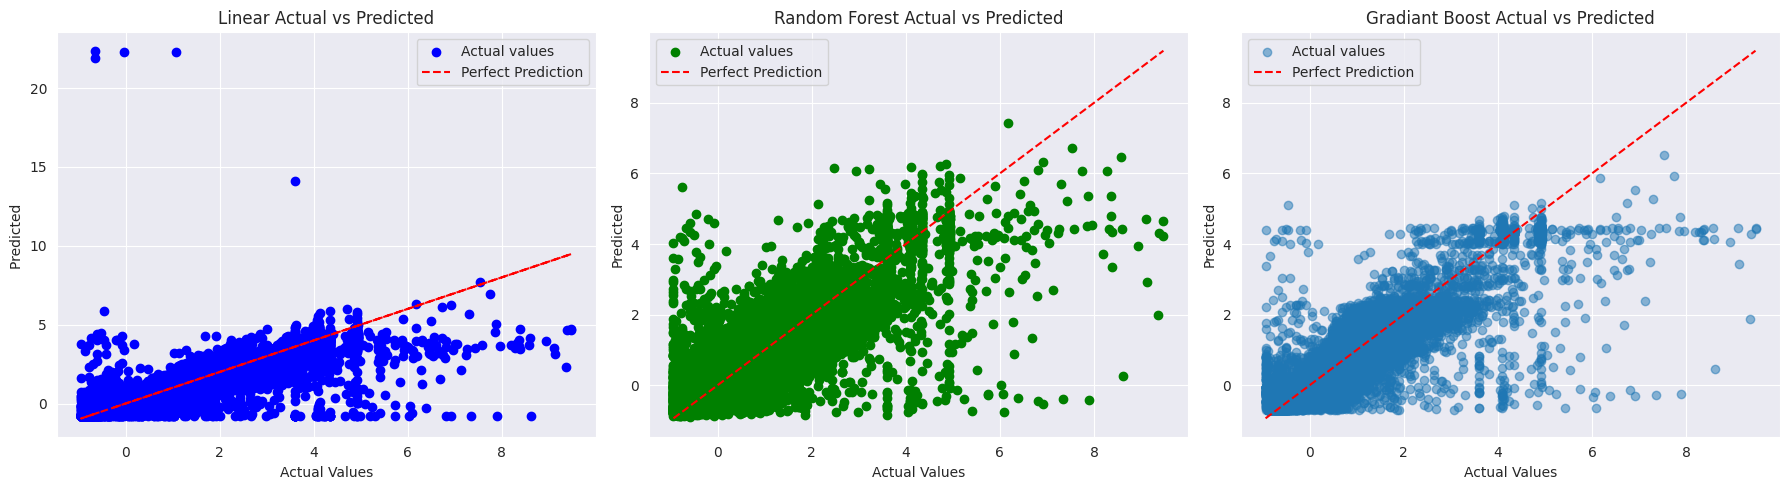

In [234]:
import matplotlib.pyplot as plt

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Actual vs. Predicted scatter plot
ax1.scatter(y_test, LR_y_predict, color='blue', label='Actual values')
ax1.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted ')
ax1.set_title('Linear Actual vs Predicted')
ax1.legend()
ax1.grid(True)

# Residuals plot
ax2.scatter(y_test, RF_y_pred, color='green', label='Actual values')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted')
ax2.set_title('Random Forest Actual vs Predicted')
ax2.legend()
ax2.grid(True)

# Histogram of Residuals
ax3.scatter(y_test, GB_y_pred, alpha=0.5, label='Actual values')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
ax3.set_xlabel('Actual Values')
ax3.set_ylabel('Predicted')
ax3.set_title('Gradiant Boost Actual vs Predicted')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()